In [1]:
from rdkit.Chem import rdMolEnumerator,rdDepictor
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True###显示原子索引
IPythonConsole.molSize = 600,600
rdDepictor.SetPreferCoordGen(True)

In [2]:
def remove_ditto(smis=[]):
    for index,item in enumerate(smis):
        smis[index] = Chem.CanonSmiles(item)
    smi_sorted = sorted(set(smis),key=smis.index)
    return smi_sorted

def enumerate_mol(mol,link_list):
    smile_plain=Chem.MolToSmiles(mol)
    mol_list=[]
    for i in link_list:
        cxsmiles_mol=Chem.MolFromSmiles(smile_plain+' '+i)
        molbundle=rdMolEnumerator.Enumerate(cxsmiles_mol)
        mol_list.extend(molbundle)
    return mol_list

def link_rule(sub_sites=[],core_sites=[],optimize_half=False):
    begin,end=core_sites[0],core_sites[1]
    sites_list=list(range(begin,(end+1),1))
    combs=[]
    if len(sub_sites)==1:
        for core_site in sites_list:
            comb='|m:%s:%s|'%(sub_sites[0],core_site)
            combs.append(comb)
    elif len(sub_sites)==2:
        import math,copy
        site1,site2=sub_sites[0],sub_sites[1]
        if optimize_half==True:
            half_interval=math.ceil((end-begin)/2)
            half_end=begin+half_interval
            sites_list=list(range(begin,(half_end+1),1))
        for core_site in sites_list:
            a=core_site
            b=copy.copy(sites_list)
            b.remove(core_site)
            b='.'.join(map(str,b))
            comb='|m:%s:%s,%s:%s|'%(site1,a,site2,b)
            combs.append(comb)
    else:
        print('子结构位点指数错误！')
    return combs

def get_enmrt_smi(sub_sites=[],core_sites=[],mol=None,sub=False,img=False):#输出枚举结果smiles和图片
    link_list=link_rule(core_sites=core_sites,sub_sites=sub_sites,optimize_half=False)
    result=enumerate_mol(mol=mol,link_list=link_list)
    smi_list=[Chem.MolToSmiles(x) for x in result]
    unique_smi_list=remove_ditto(smis=smi_list)
    if sub:
        unique_smi_list=[x.replace('[Y]','[*]') for x in unique_smi_list]
        unique_smi_list=[Chem.CanonSmiles(x) for x in unique_smi_list]
    else:
        smiles_enumerate='.'.join(unique_smi_list)
        with open('smiles_enumerate.txt','w') as file:
            file.write(smiles_enumerate)
    if img:       
        result_unique=[]
        for i in unique_smi_list:
            mol=Chem.MolFromSmiles(i)
            rdDepictor.Compute2DCoords(mol)
            result_unique.append(mol)
        image=Draw.MolsToGridImage(result_unique,molsPerRow=5,
                                    legends=list(map(str,list(range(len(result_unique))))),
                                    useSVG=True,
                                    subImgSize=(200,200))
    else:
        image=None
    return unique_smi_list,image

def enmrt_by_sublist(core_sites=[],sub_sites=[],core_smi='',sub_list=[],sub=False,img=False):
    smi_list=[]
    if len(sub_list)==2:
        for i in sub_list[0]:
            for k in sub_list[1]:
                smiles=i+'.'+k+'.'+core_smi
                mol=Chem.MolFromSmiles(Chem.CanonSmiles(smiles))
                result=get_enmrt_smi(core_sites=core_sites,sub_sites=sub_sites,mol=mol,sub=True,img=img)
                smi_list.extend(result[0])
        unique_smi_list=remove_ditto(smis=smi_list)
    else:
        print('取代基团列表错误')
        return None
    if not sub:
        smiles_enumerate='.'.join(unique_smi_list)
        with open('smiles_enumerate.txt','w') as file:
            file.write(smiles_enumerate)
    return unique_smi_list

In [3]:
CXSMILES=Chem.CanonSmiles('[*]N1C2=C(C=CC=C2)C3=CC=CC=C31.[*]C4=CC=CC=C4.[Y]C4=CC=CC=C4')
print(CXSMILES)

*c1ccccc1.*n1c2ccccc2c2ccccc21.[Y]c1ccccc1


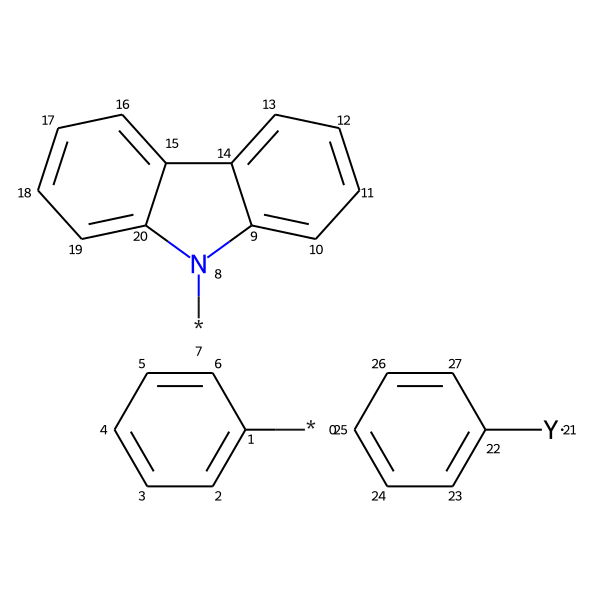

In [4]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles(CXSMILES))
mol

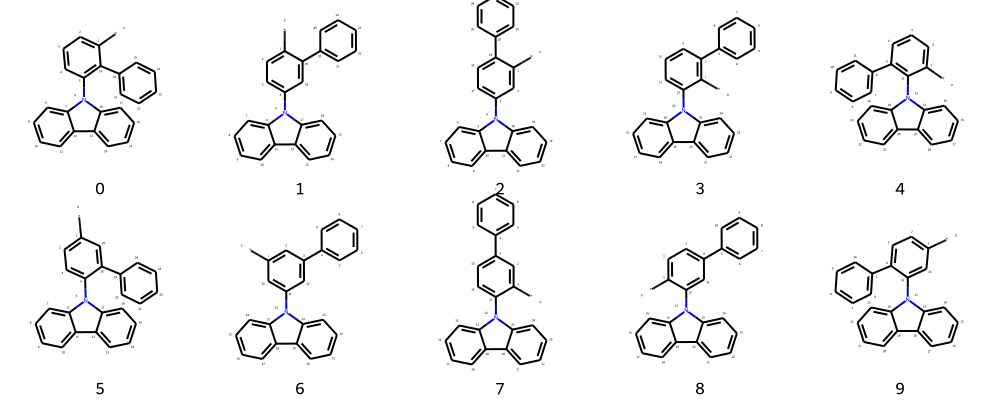

In [8]:
sub_molbundle=get_enmrt_smi(sub_sites=[0,7],core_sites=[23,27],mol=mol,sub=True,img=True)
sub_molbundle[1]

In [26]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles('*c1cc[*]cc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1'))
atoms=mol.GetAtoms()
for atom in atoms:
		if atom.GetSymbol()=='*':
			print(atom.GetIdx())

0
4


In [6]:
sub_molbundle1=get_enmrt_smi(sub_sites=[0,7],core_sites=[23,27],mol=mol,sub=True,img=True)
sub_molbundle1

(['*c1cccc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1',
  '*c1ccc(-n2c3ccccc3c3ccccc32)cc1-c1ccccc1',
  '*c1cc(-n2c3ccccc3c3ccccc32)ccc1-c1ccccc1',
  '*c1c(-c2ccccc2)cccc1-n1c2ccccc2c2ccccc21',
  '*c1cccc(-c2ccccc2)c1-n1c2ccccc2c2ccccc21',
  '*c1ccc(-n2c3ccccc3c3ccccc32)c(-c2ccccc2)c1',
  '*c1cc(-c2ccccc2)cc(-n2c3ccccc3c3ccccc32)c1',
  '*c1cc(-c2ccccc2)ccc1-n1c2ccccc2c2ccccc21',
  '*c1ccc(-c2ccccc2)cc1-n1c2ccccc2c2ccccc21',
  '*c1ccc(-c2ccccc2)c(-n2c3ccccc3c3ccccc32)c1'],
 <IPython.core.display.SVG object>)

In [12]:
CXSMILES1=Chem.CanonSmiles('*c1cccc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1.C1(C2=CC=CC=C2O3)=C3C=CC=C1.[*]C1=NC(C2=CC=CC=C2)=NC(C3=CC=CC=C3)=N1')
CXSMILES1

'*c1cccc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1.*c1nc(-c2ccccc2)nc(-c2ccccc2)n1.c1ccc2c(c1)oc1ccccc12'

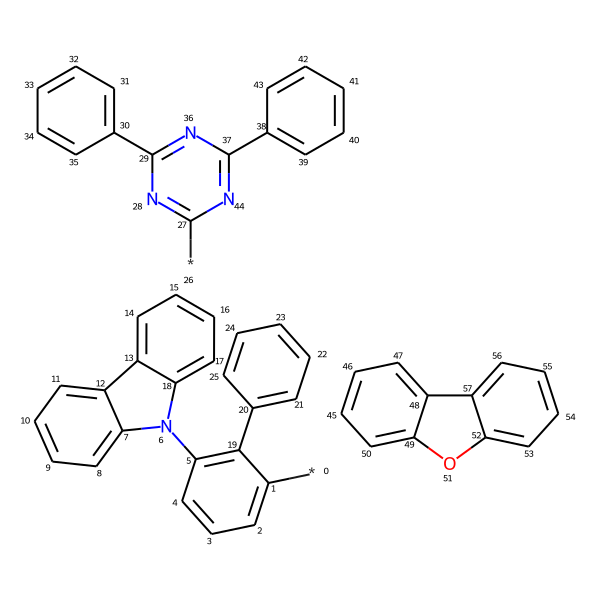

In [13]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles(CXSMILES1))
mol

In [21]:
sub_list=[sub_molbundle[0],['*c1nc(-c2ccccc2)nc(-c2ccccc2)n1']]
a22_r=enmrt_by_sublist(core_sites=[53,56],sub_sites=[0,26],core_smi='c1ccc2c(c1)oc1ccccc12',sub_list=sub_list,sub=False)

In [20]:
len(a22_r)

90

D:\conda\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


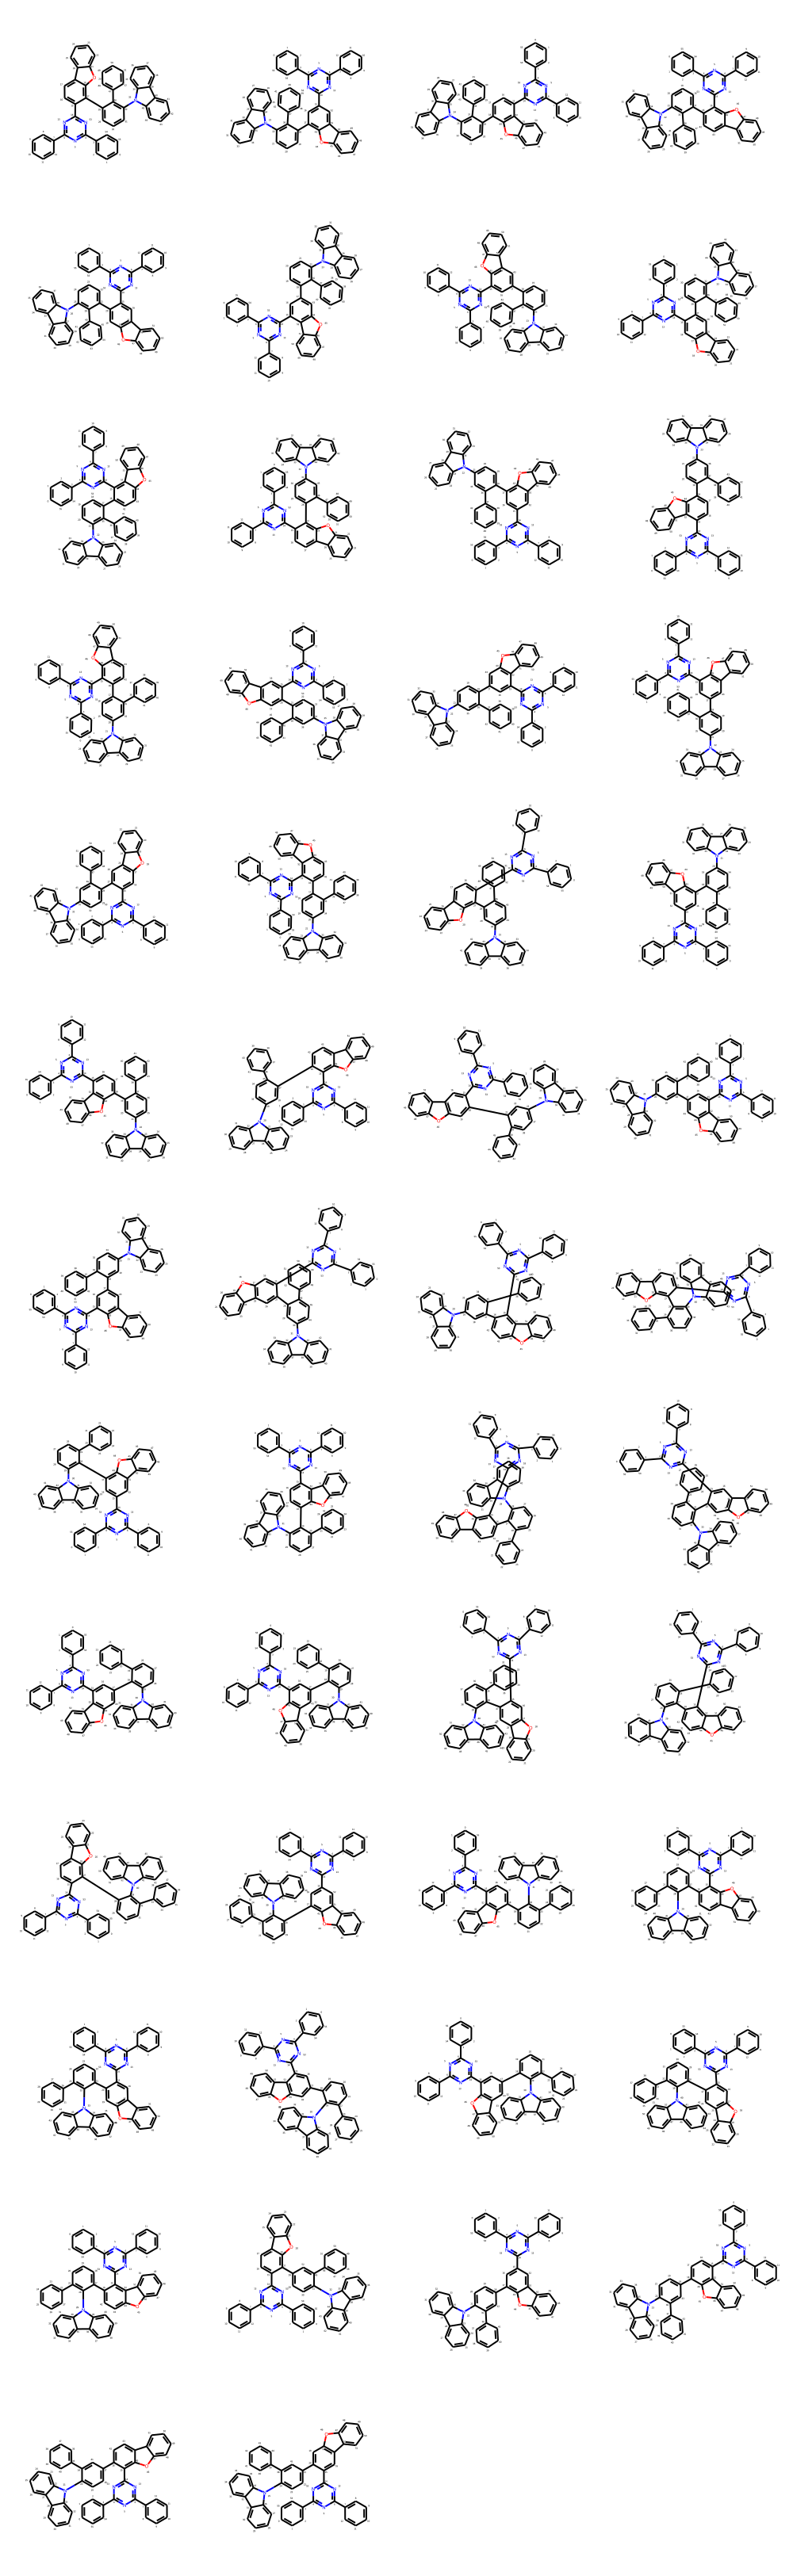

In [18]:
mol_list=[]
for x in a22_r:
    mol=Chem.MolFromSmiles(x)
    rdDepictor.Compute2DCoords(mol,nSample=4,permuteDeg4Nodes=True,canonOrient=True)
    mol_list.append(mol)
Draw.MolsToGridImage(mol_list,molsPerRow=4,subImgSize=(250,250))

In [14]:
def enmrt_by_sublist(core_sites=[],sub_sites=[],smi='',sub_list=[],sub=False,img=False):
    smi_list=[]
    if len(sub_list)==2:
        for i in sub_list[0]:
            for k in sub_list[1]:
                smiles=i+'.'+k+'.'+smi
                print(smiles)
                mol=Chem.MolFromSmiles(Chem.CanonSmiles(smiles))
                result=get_enmrt_smi(core_sites=core_sites,sub_sites=sub_sites,mol=mol,sub=sub,img=img)
                smi_list.extend(result[0])
    else:
        print('取代基团列表错误')
        return None
    return smi_list


In [8]:
sub_list=[sub_molbundle[0],['*c1ccccc1']]


In [9]:
a21_r=enmrt_by_sublist(core_sites=[23,27],sub_sites=[0,14],core_smi='[Y]c1ccccc1',sub_list=sub_list,sub=True)

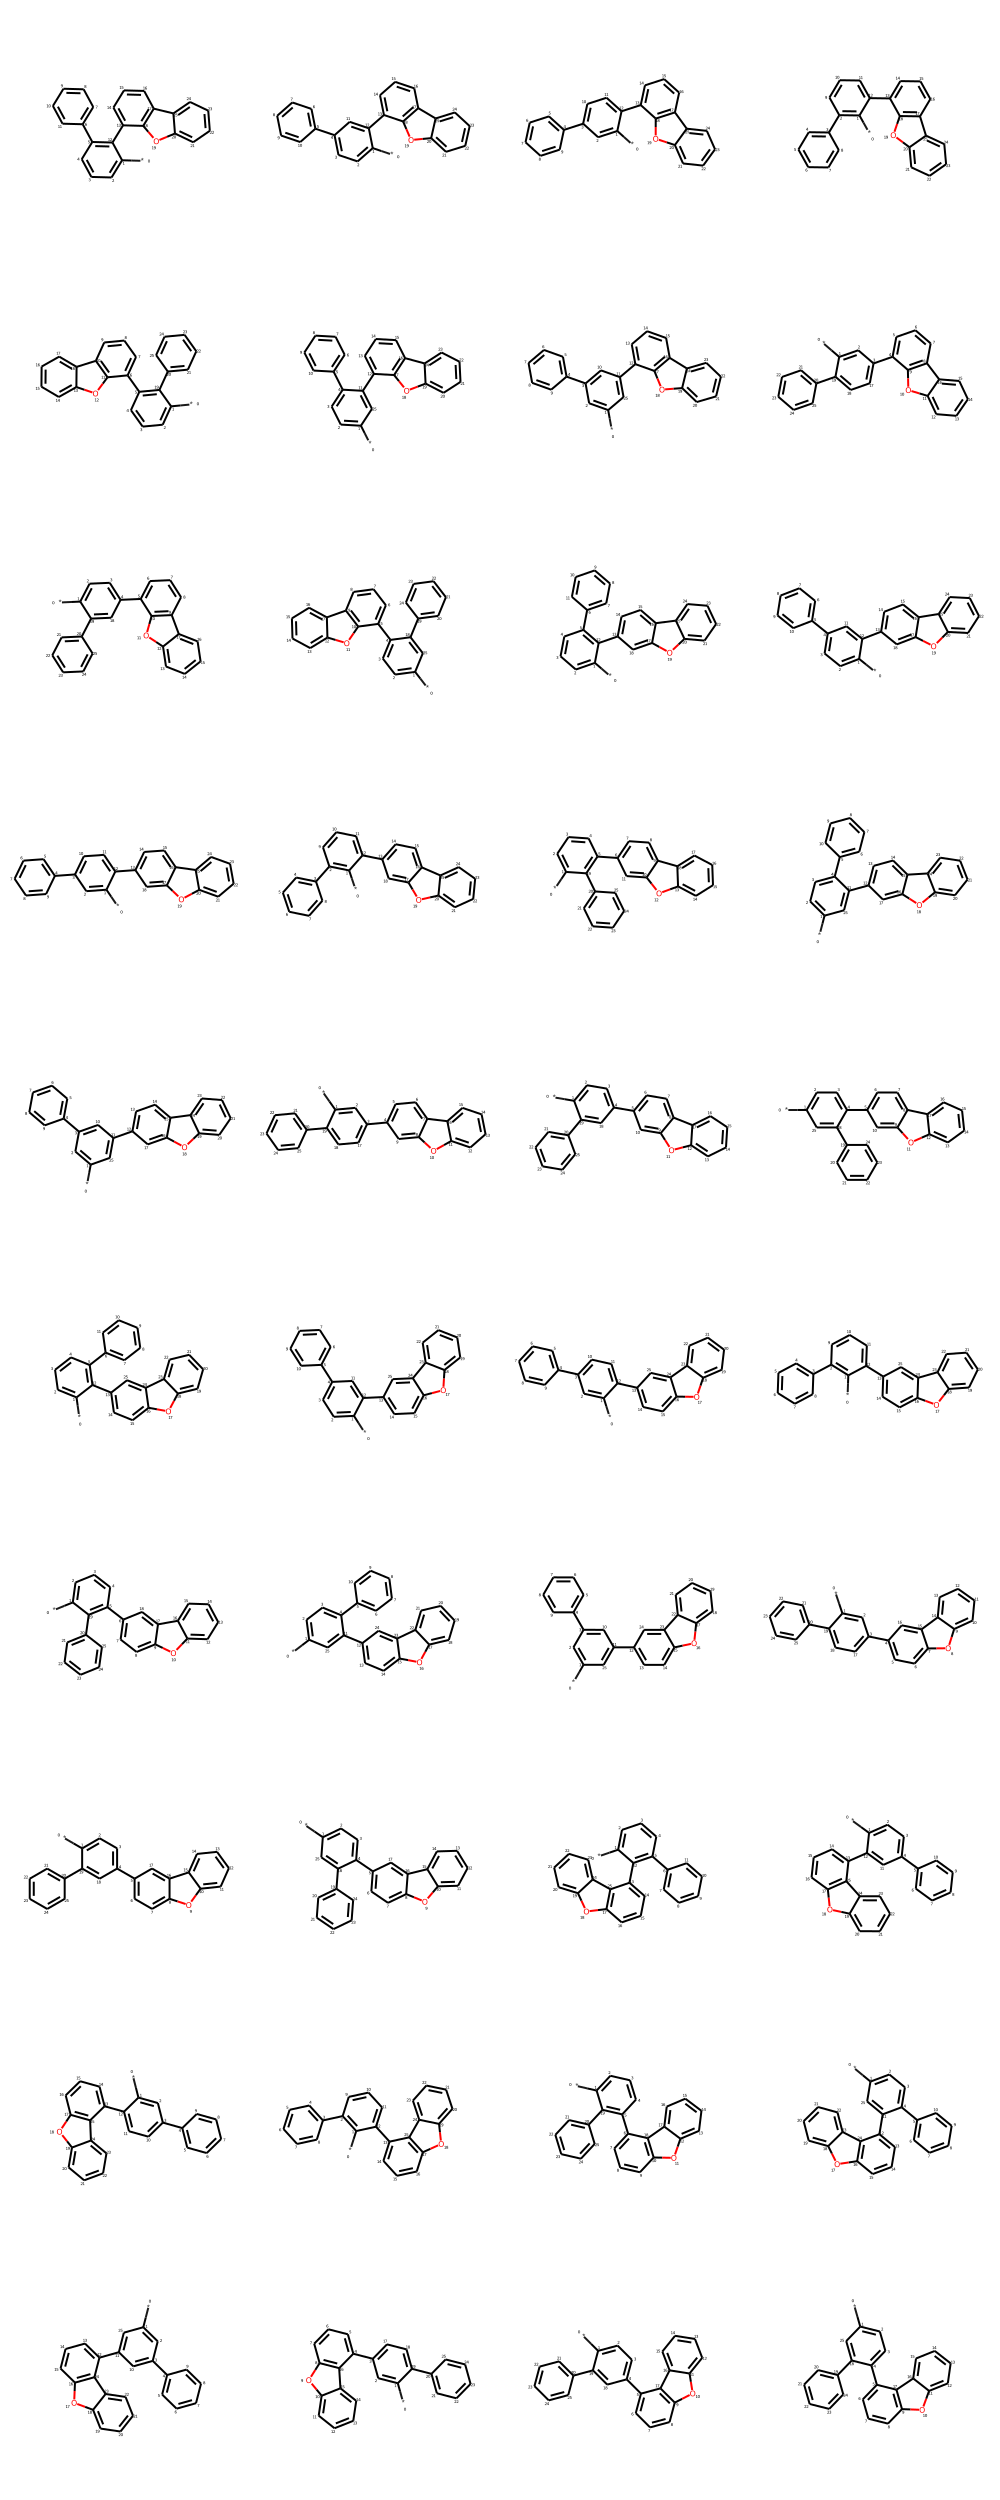

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in a21_r],molsPerRow=4,subImgSize=(250,250))

In [43]:
R1=enmrt_by_sublist(core_sites=[53,56],sub_sites=[0,26],core_smi='C1(C2=CC=CC=C2O3)=C3C=CC=C1',sub_list=[a21_r,['[*]C1=NC(C2=CC=CC=C2)=NC(C3=CC=CC=C3)=N1']],sub=False)

In [41]:
len(R1)

360

In [ ]:
mol_list=[]
for x in R1:
    mol=Chem.MolFromSmiles(x)
    rdDepictor.Compute2DCoords(mol,nSample=4,permuteDeg4Nodes=True,canonOrient=True)
    mol_list.append(mol)
Draw.MolsToGridImage(mol_list,molsPerRow=4,subImgSize=(250,250))

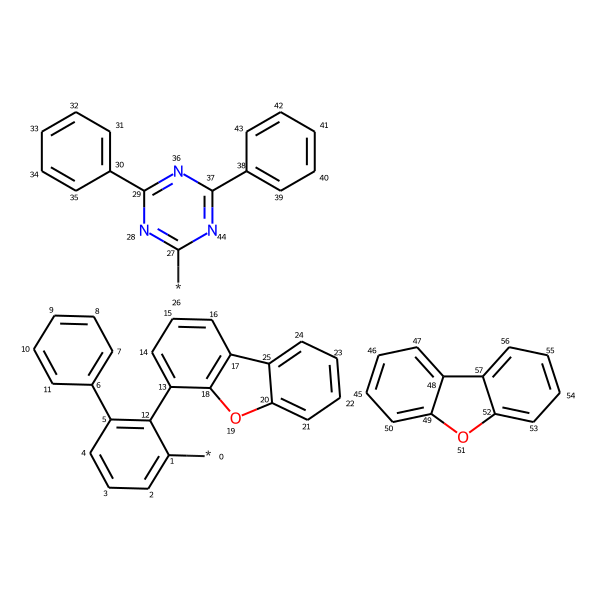

In [21]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles('C1(C2=CC=CC=C2O3)=C3C=CC=C1.'+a21_r[0]+'.[*]C1=NC(C2=CC=CC=C2)=NC(C3=CC=CC=C3)=N1'))
mol

In [11]:
result=get_enmrt_smi(core_sites=[23,27],sub_sites=[0,7],sub=True,mol=mol,img=True)
a22=result[0]
a22

删除2重复的smile分子式


['*c1cccc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1',
 '*c1ccc(-n2c3ccccc3c3ccccc32)cc1-c1ccccc1',
 '*c1cc(-n2c3ccccc3c3ccccc32)ccc1-c1ccccc1',
 '*c1c(-c2ccccc2)cccc1-n1c2ccccc2c2ccccc21',
 '*c1cccc(-c2ccccc2)c1-n1c2ccccc2c2ccccc21',
 '*c1ccc(-n2c3ccccc3c3ccccc32)c(-c2ccccc2)c1',
 '*c1cc(-c2ccccc2)cc(-n2c3ccccc3c3ccccc32)c1',
 '*c1cc(-c2ccccc2)ccc1-n1c2ccccc2c2ccccc21',
 '*c1ccc(-c2ccccc2)cc1-n1c2ccccc2c2ccccc21',
 '*c1ccc(-c2ccccc2)c(-n2c3ccccc3c3ccccc32)c1']

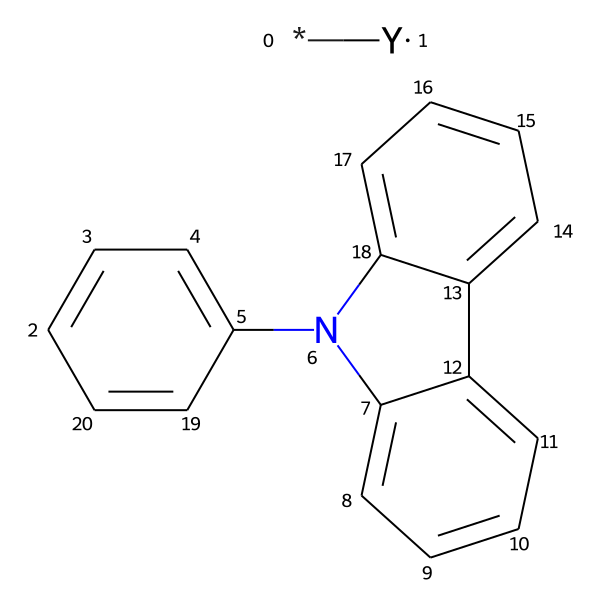

In [23]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles('[*][Y].C12=CC=CC=C1N(C3=CC=CC=C3)C4=C2C=CC=C4'))
mol

In [24]:
sub_molbundle1=get_enmrt_smi(core_sites=[8,11],sub_sites=[0],mol=mol,sub=True,img=False)

In [25]:
sub_molbundle1[0]

['*c1cccc2c3ccccc3n(-c3ccccc3)c12',
 '*c1ccc2c3ccccc3n(-c3ccccc3)c2c1',
 '*c1ccc2c(c1)c1ccccc1n2-c1ccccc1',
 '*c1cccc2c1c1ccccc1n2-c1ccccc1']

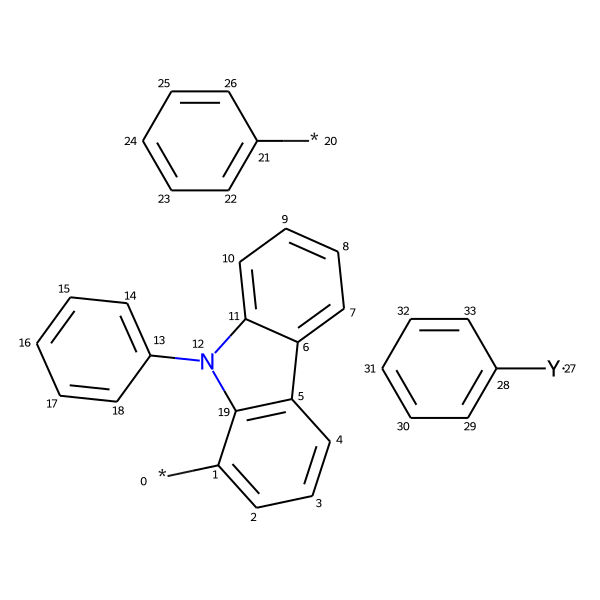

In [26]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles(sub_molbundle1[0][0]+'.'+'[*]C1=CC=CC=C1.[Y]C1=CC=CC=C1'))
mol

In [28]:
a31=enmrt_by_sublist(core_sites=[29,33],sub_sites=[0,20],core_smi='[Y]C1=CC=CC=C1',sub_list=[sub_molbundle1[0],['[*]C1=CC=CC=C1']],sub=True)

D:\conda\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


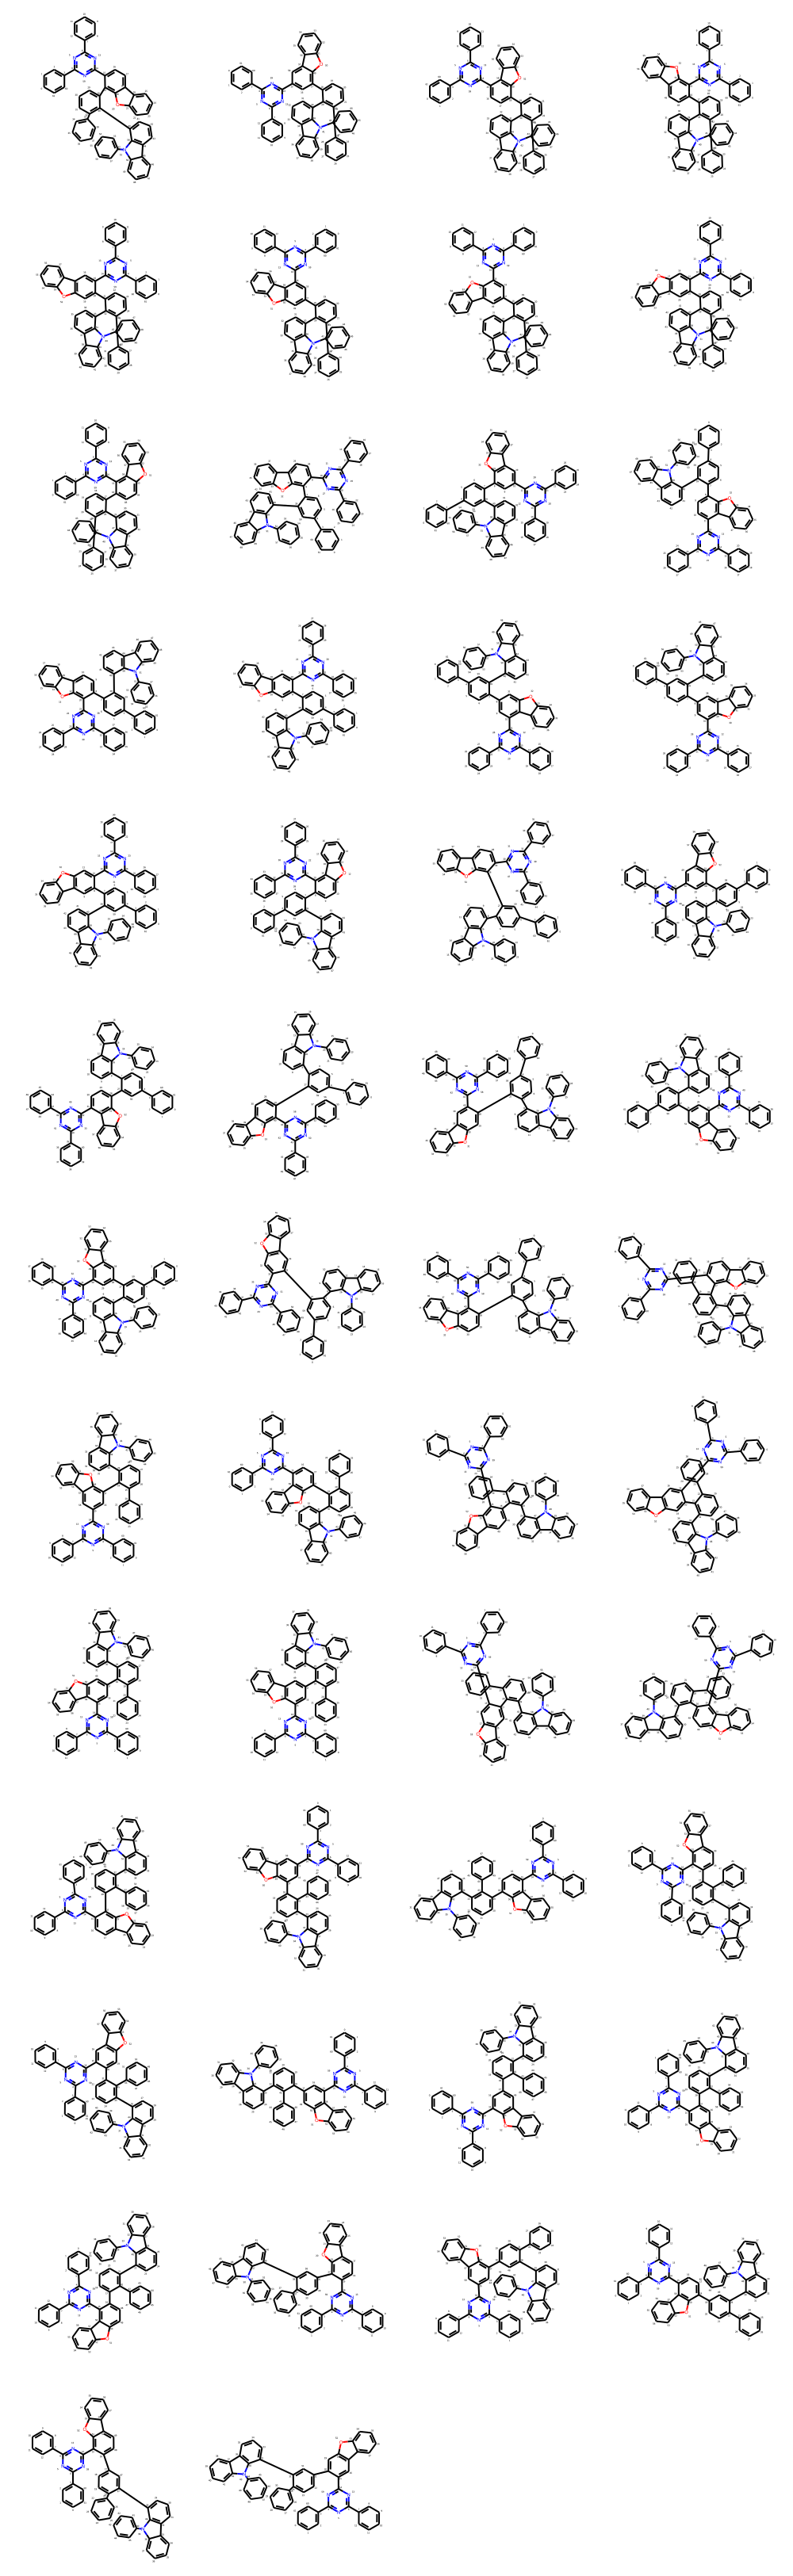

In [34]:
mol_list=[]
for x in a3:
    mol=Chem.MolFromSmiles(x)
    rdDepictor.Compute2DCoords(mol,nSample=4,permuteDeg4Nodes=True,canonOrient=True)
    mol_list.append(mol)
Draw.MolsToGridImage(mol_list,molsPerRow=4,subImgSize=(250,250))

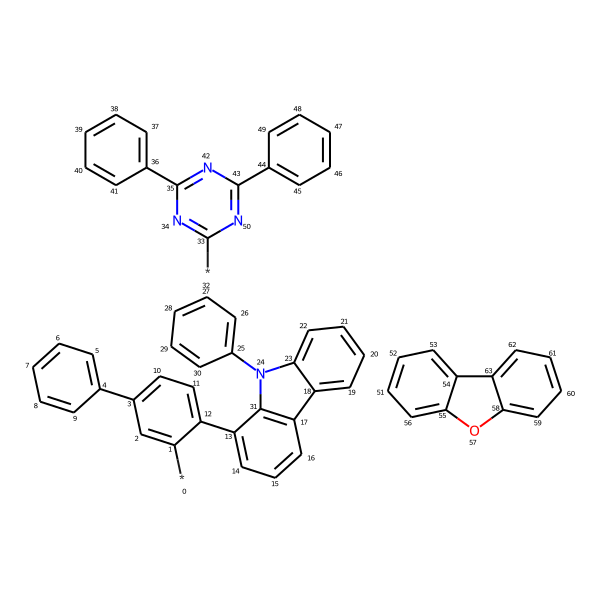

In [32]:
Chem.MolFromSmiles(Chem.CanonSmiles(a31[2]+'.'+'[*]C1=NC(C2=CC=CC=C2)=NC(C3=CC=CC=C3)=N1.C4(C5=CC=CC=C5O6)=C6C=CC=C4'))

In [33]:
a3=enmrt_by_sublist(core_sites=[59,62],sub_sites=[0,32],core_smi='C4(C5=CC=CC=C5O6)=C6C=CC=C4',sub_list=[a31,['[*]C1=NC(C2=CC=CC=C2)=NC(C3=CC=CC=C3)=N1']],sub=False)

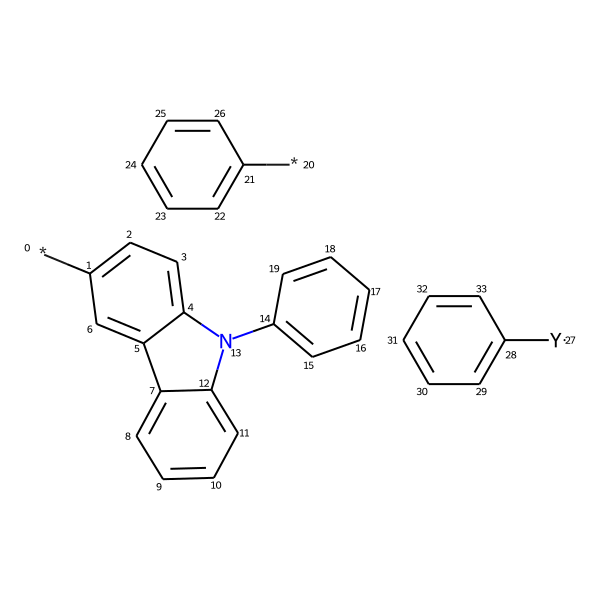

In [22]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles('[*]C2=CC=CC=C2.[Y]C1=CC=CC=C1.*c1ccc2c(c1)c1ccccc1n2-c1ccccc1'))
mol

删除2重复的smile分子式


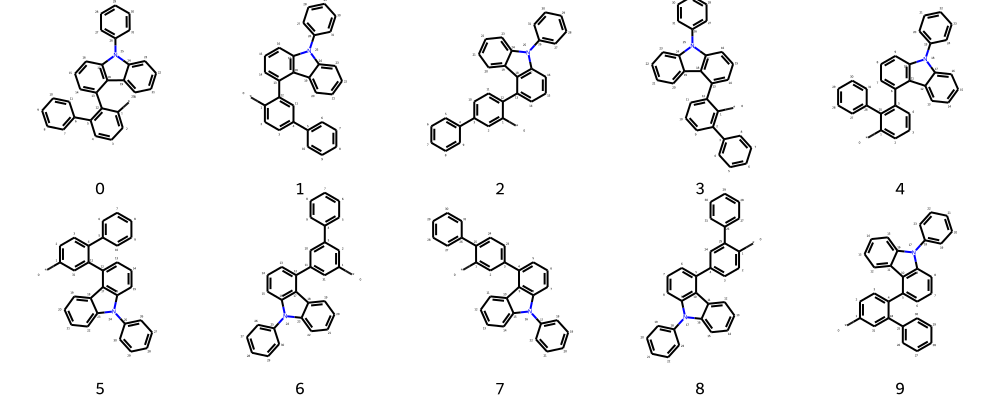

In [23]:
result234=get_enmrt_smi(core_sites=[29,33],sub_sites=[0,20],sub=True,mol=mol,img=True)
result234[-1]

In [ ]:
result23=[]
for i in [result231[0],result232[0],result233[0],result234[0]]:
    result23.extend(i)

In [ ]:
result23

In [70]:
cxsmiles=Chem.CanonSmiles('c1c(*)ccc2oc3ccccc3c12')
cxsmiles

'*c1ccc2oc3ccccc3c2c1'

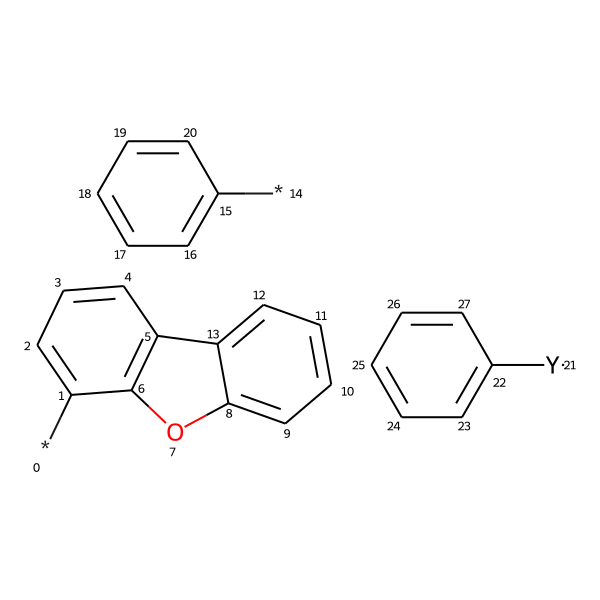

In [85]:
mol=Chem.MolFromSmiles(Chem.CanonSmiles('c1ccc(*)c2oc3ccccc3c12.*c1ccccc1.[Y]c1ccccc1'))
mol

删除2重复的smile分子式


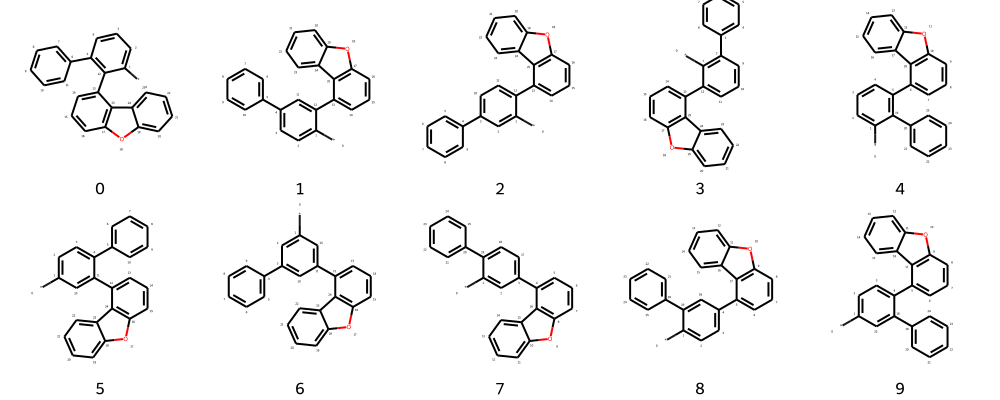

In [80]:
result211=get_enmrt_smi(core_sites=[23,27],sub_sites=[0,14],sub=True,mol=mol,img=True)
result211[-1]

删除2重复的smile分子式


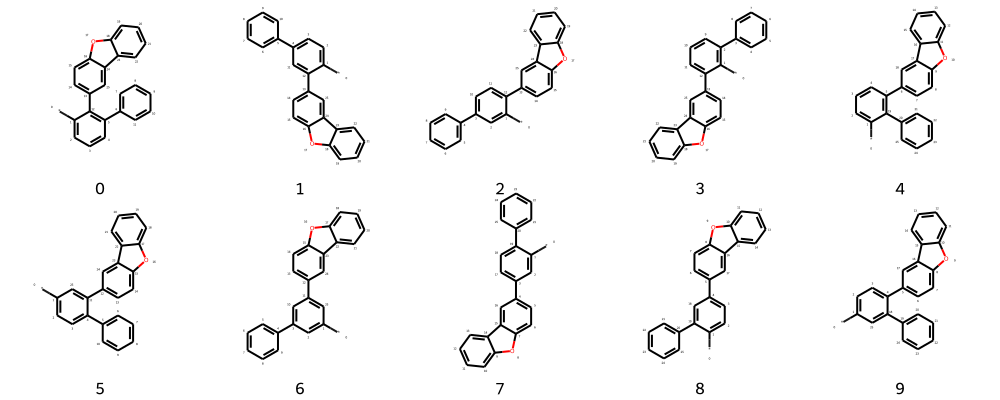

In [82]:
result212=get_enmrt_smi(core_sites=[23,27],sub_sites=[0,14],sub=True,mol=mol,img=True)
result212[-1]

删除2重复的smile分子式


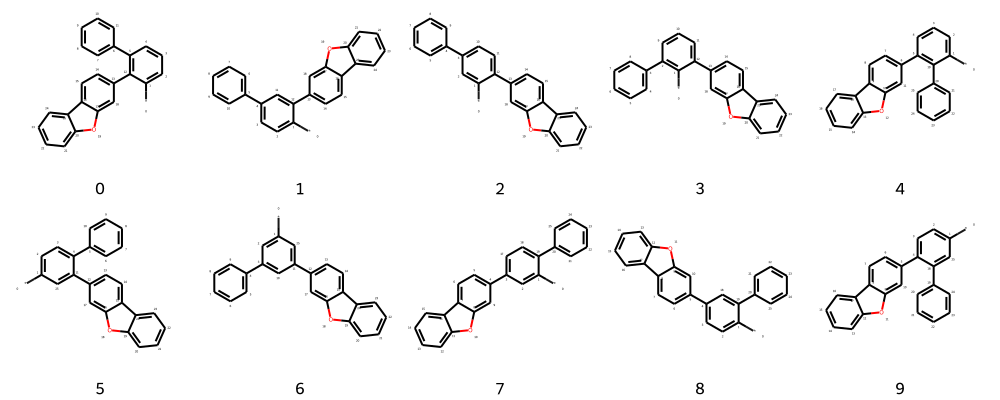

In [84]:
result213=get_enmrt_smi(core_sites=[23,27],sub_sites=[0,14],sub=True,mol=mol,img=True)
result213[-1]

删除2重复的smile分子式


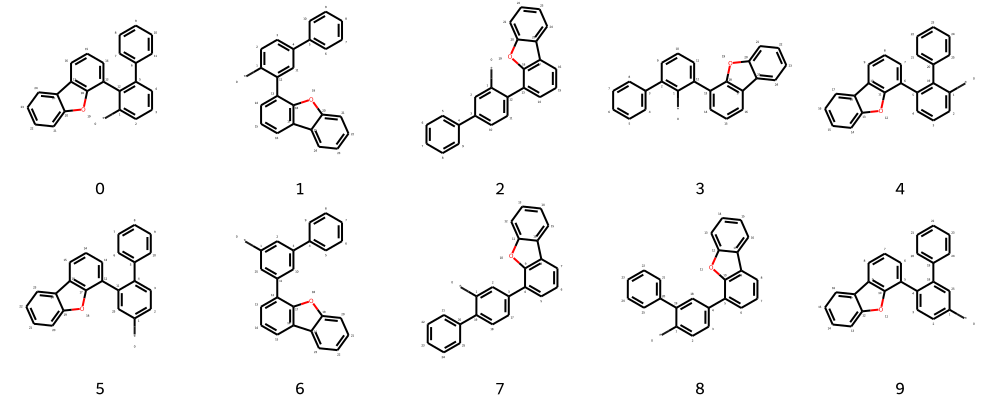

In [86]:
result214=get_enmrt_smi(core_sites=[23,27],sub_sites=[0,14],sub=True,mol=mol,img=True)
result214[-1]

In [87]:
result21=[]
for i in [result211[0],result212[0],result213[0],result214[0]]:
    result21.extend(i)

In [90]:
sub_a21=result21

In [91]:
sub_a22=result22

In [92]:
sub_a23=result23

In [93]:
sub_a21

['[*]c1cccc(-c2ccccc2)c1-c1cccc2oc3ccccc3c12',
 '[*]c1ccc(-c2ccccc2)cc1-c1cccc2oc3ccccc3c12',
 '[*]c1cc(-c2ccccc2)ccc1-c1cccc2oc3ccccc3c12',
 '[*]c1c(-c2ccccc2)cccc1-c1cccc2oc3ccccc3c12',
 '[*]c1cccc(-c2cccc3oc4ccccc4c23)c1-c1ccccc1',
 '[*]c1ccc(-c2ccccc2)c(-c2cccc3oc4ccccc4c23)c1',
 '[*]c1cc(-c2ccccc2)cc(-c2cccc3oc4ccccc4c23)c1',
 '[*]c1cc(-c2cccc3oc4ccccc4c23)ccc1-c1ccccc1',
 '[*]c1ccc(-c2cccc3oc4ccccc4c23)cc1-c1ccccc1',
 '[*]c1ccc(-c2cccc3oc4ccccc4c23)c(-c2ccccc2)c1',
 '[*]c1cccc(-c2ccccc2)c1-c1ccc2oc3ccccc3c2c1',
 '[*]c1ccc(-c2ccccc2)cc1-c1ccc2oc3ccccc3c2c1',
 '[*]c1cc(-c2ccccc2)ccc1-c1ccc2oc3ccccc3c2c1',
 '[*]c1c(-c2ccccc2)cccc1-c1ccc2oc3ccccc3c2c1',
 '[*]c1cccc(-c2ccc3oc4ccccc4c3c2)c1-c1ccccc1',
 '[*]c1ccc(-c2ccccc2)c(-c2ccc3oc4ccccc4c3c2)c1',
 '[*]c1cc(-c2ccccc2)cc(-c2ccc3oc4ccccc4c3c2)c1',
 '[*]c1cc(-c2ccc3oc4ccccc4c3c2)ccc1-c1ccccc1',
 '[*]c1ccc(-c2ccc3oc4ccccc4c3c2)cc1-c1ccccc1',
 '[*]c1ccc(-c2ccc3oc4ccccc4c3c2)c(-c2ccccc2)c1',
 '[*]c1cccc(-c2ccccc2)c1-c1ccc2c(c1)oc1ccccc12',

In [94]:
sub_a22

(['[*]c1cccc(-n2c3ccccc3c3ccccc32)c1-c1ccccc1',
  '[*]c1ccc(-n2c3ccccc3c3ccccc32)cc1-c1ccccc1',
  '[*]c1cc(-n2c3ccccc3c3ccccc32)ccc1-c1ccccc1',
  '[*]c1c(-c2ccccc2)cccc1-n1c2ccccc2c2ccccc21',
  '[*]c1cccc(-c2ccccc2)c1-n1c2ccccc2c2ccccc21',
  '[*]c1ccc(-n2c3ccccc3c3ccccc32)c(-c2ccccc2)c1',
  '[*]c1cc(-c2ccccc2)cc(-n2c3ccccc3c3ccccc32)c1',
  '[*]c1cc(-c2ccccc2)ccc1-n1c2ccccc2c2ccccc21',
  '[*]c1ccc(-c2ccccc2)cc1-n1c2ccccc2c2ccccc21',
  '[*]c1ccc(-c2ccccc2)c(-n2c3ccccc3c3ccccc32)c1'],
 <IPython.core.display.SVG object>)

In [95]:
sub_a23

['[*]c1cccc(-c2ccccc2)c1-c1cccc2c3ccccc3n(-c3ccccc3)c12',
 '[*]c1ccc(-c2ccccc2)cc1-c1cccc2c3ccccc3n(-c3ccccc3)c12',
 '[*]c1cc(-c2ccccc2)ccc1-c1cccc2c3ccccc3n(-c3ccccc3)c12',
 '[*]c1c(-c2ccccc2)cccc1-c1cccc2c3ccccc3n(-c3ccccc3)c12',
 '[*]c1cccc(-c2cccc3c4ccccc4n(-c4ccccc4)c23)c1-c1ccccc1',
 '[*]c1ccc(-c2ccccc2)c(-c2cccc3c4ccccc4n(-c4ccccc4)c23)c1',
 '[*]c1cc(-c2ccccc2)cc(-c2cccc3c4ccccc4n(-c4ccccc4)c23)c1',
 '[*]c1cc(-c2cccc3c4ccccc4n(-c4ccccc4)c23)ccc1-c1ccccc1',
 '[*]c1ccc(-c2cccc3c4ccccc4n(-c4ccccc4)c23)cc1-c1ccccc1',
 '[*]c1ccc(-c2cccc3c4ccccc4n(-c4ccccc4)c23)c(-c2ccccc2)c1',
 '[*]c1cccc(-c2ccccc2)c1-c1ccc2c3ccccc3n(-c3ccccc3)c2c1',
 '[*]c1ccc(-c2ccccc2)cc1-c1ccc2c3ccccc3n(-c3ccccc3)c2c1',
 '[*]c1cc(-c2ccccc2)ccc1-c1ccc2c3ccccc3n(-c3ccccc3)c2c1',
 '[*]c1c(-c2ccccc2)cccc1-c1ccc2c3ccccc3n(-c3ccccc3)c2c1',
 '[*]c1cccc(-c2ccc3c4ccccc4n(-c4ccccc4)c3c2)c1-c1ccccc1',
 '[*]c1ccc(-c2ccccc2)c(-c2ccc3c4ccccc4n(-c4ccccc4)c3c2)c1',
 '[*]c1cc(-c2ccccc2)cc(-c2ccc3c4ccccc4n(-c4ccccc4)c3c2)c1',
 '[*

In [36]:
allsmiles_txt=[]
for i in ['smiles_A21.txt','smiles_A22.txt','smiles_A23.txt']:
    with open(i, 'r') as smi_f:
        data = smi_f.read()
    smiles_list=data.split('.',-1)
    allsmiles_txt.extend(smiles_list)

with open('AllSmiles.txt','w') as file:
    file.write('.'.join(allsmiles_txt))

In [40]:
def count():
    fs = [2]
    for i in range(1, 4):
        def f():
             return i*i
        fs.append(f)
    return fs

f1, f2, f3 = count()
f2()

ValueError: too many values to unpack (expected 3)